# What historical trends exist between central bank interest rate changes and movements in major stock market indices?


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd
from datetime import datetime
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)


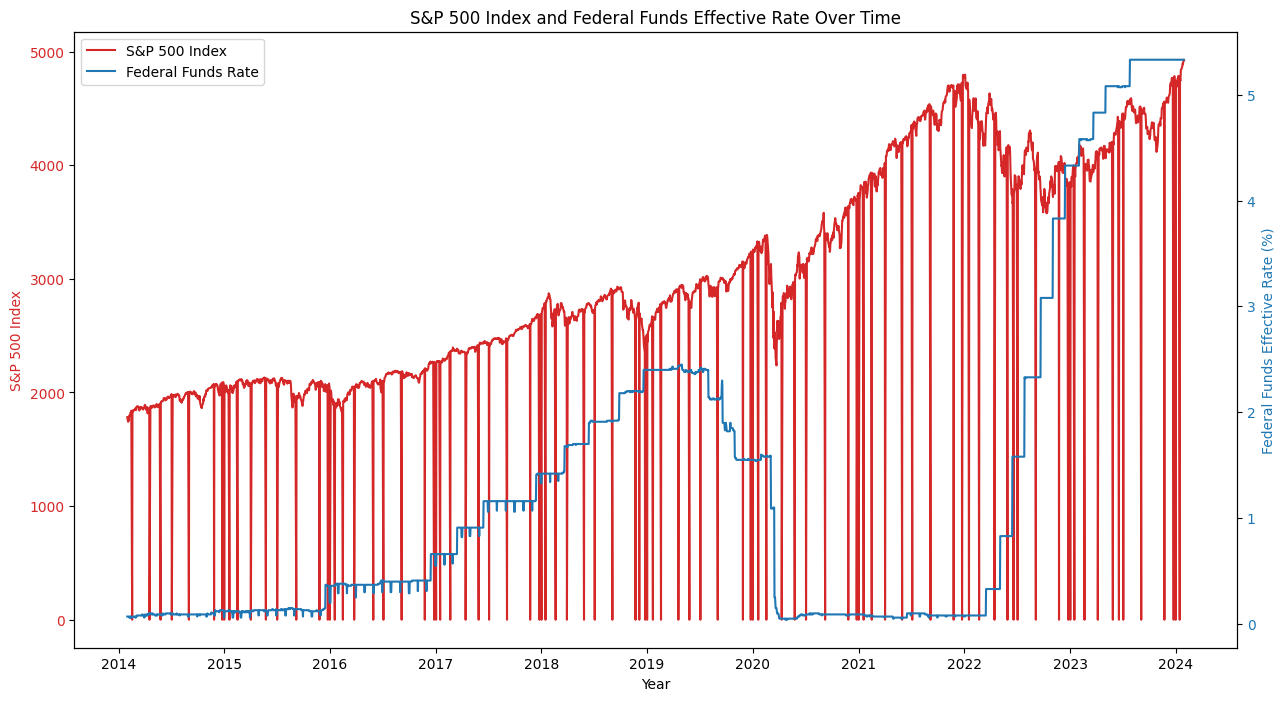

In [4]:
# Loading S&P 500 data
sp500_data_path = 'SP500.xls'
sp500_df = pd.read_excel(sp500_data_path, skiprows=10)
sp500_df.set_index('observation_date', inplace=True)
fed_funds_rate_data_path = 'DFF.xls'

# Loading and preparing the data
sp500_df = pd.read_excel(sp500_data_path, skiprows=10).set_index('observation_date')
fed_funds_rate_df = pd.read_excel(fed_funds_rate_data_path, skiprows=10).set_index('observation_date')
trimmed_fed_funds_rate_df = fed_funds_rate_df[fed_funds_rate_df.index >= sp500_df.index.min()]

# Create plot
fig, ax1 = plt.subplots(figsize=(15, 8))
ax1.set_xlabel('Year')
ax1.set_ylabel('S&P 500 Index', color='tab:red')
sp500_line, = ax1.plot(sp500_df.index, sp500_df['SP500'], color='tab:red', label='S&P 500 Index')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('Federal Funds Effective Rate (%)', color='tab:blue')
fed_funds_rate_line, = ax2.plot(trimmed_fed_funds_rate_df.index, trimmed_fed_funds_rate_df['DFF'], color='tab:blue', label='Federal Funds Rate')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Adding legends
lines = [sp500_line, fed_funds_rate_line]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

plt.title('S&P 500 Index and Federal Funds Effective Rate Over Time')
plt.show()

# How do interest rate changes affect different sectors within the stock market (e.g., technology, finance, manufacturing)


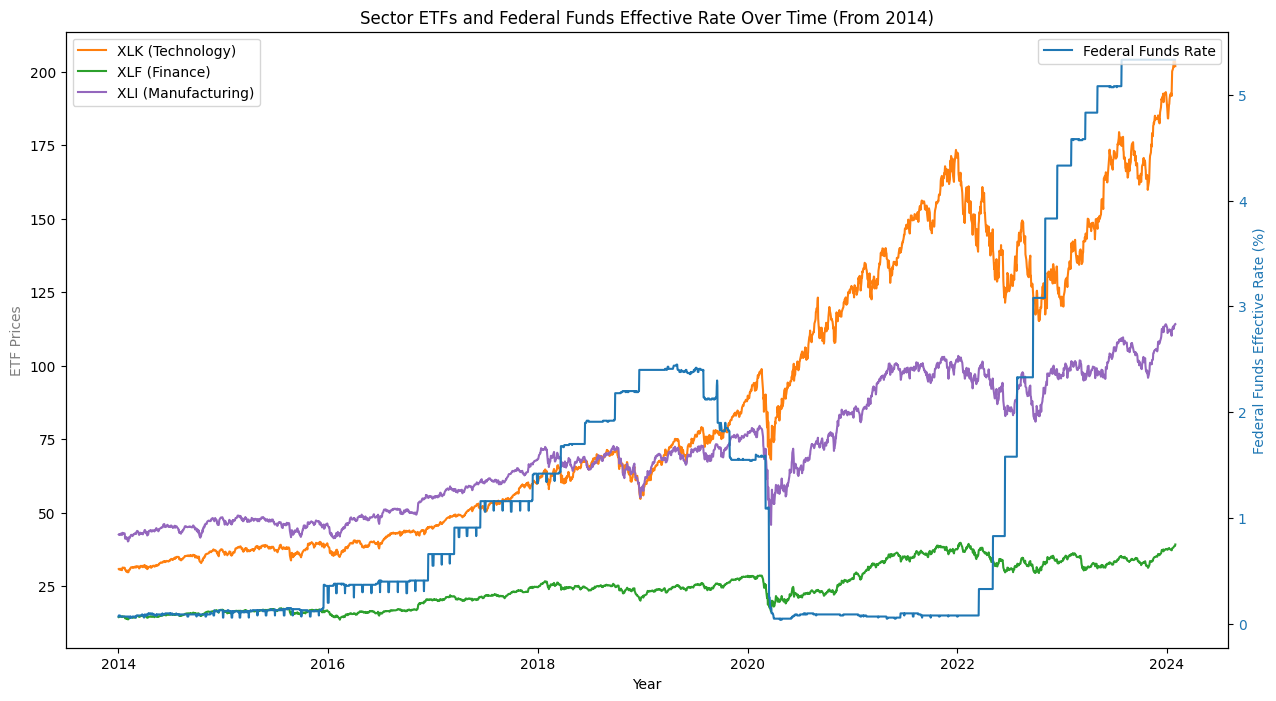

In [6]:
def load_and_prepare_data(file_path, start_year):
    df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
    return df[df.index.year >= start_year]['Adj Close']


xlk_data_path = 'XLK.csv'  # Technology
xlf_data_path = 'XLF.csv'  # Finance
xli_data_path = 'XLI.csv'  # Manufacturing
fed_funds_rate_data_path = 'DFF.xls'  # Federal Funds Rate

# data starting from 2014
start_year_2014 = 2014
xlk = load_and_prepare_data(xlk_data_path, start_year_2014)
xlf = load_and_prepare_data(xlf_data_path, start_year_2014)
xli = load_and_prepare_data(xli_data_path, start_year_2014)
fed_funds_rate = pd.read_excel(fed_funds_rate_data_path, skiprows=10, parse_dates=['observation_date'], index_col='observation_date')
fed_funds_rate = fed_funds_rate[fed_funds_rate.index.year >= start_year_2014]['DFF']

# Plotting
plt.figure(figsize=(15, 8))
plt.xlabel('Year')
plt.ylabel('ETF Prices', color='tab:gray')
plt.plot(xlk.index, xlk, label='XLK (Technology)', color='tab:orange')
plt.plot(xlf.index, xlf, label='XLF (Finance)', color='tab:green')
plt.plot(xli.index, xli, label='XLI (Manufacturing)', color='tab:purple')
plt.title('Sector ETFs and Federal Funds Effective Rate Over Time (From 2014)')
plt.legend(loc='upper left')

ax2 = plt.gca().twinx()
ax2.plot(fed_funds_rate.index, fed_funds_rate, label='Federal Funds Rate', color='tab:blue')
ax2.set_ylabel('Federal Funds Effective Rate (%)', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.legend(loc='upper right')

plt.show()


/tmp/ipykernel_30780/3452799915.py:26: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  monthly_changes = merged_df.resample('M').last().pct_change().dropna()


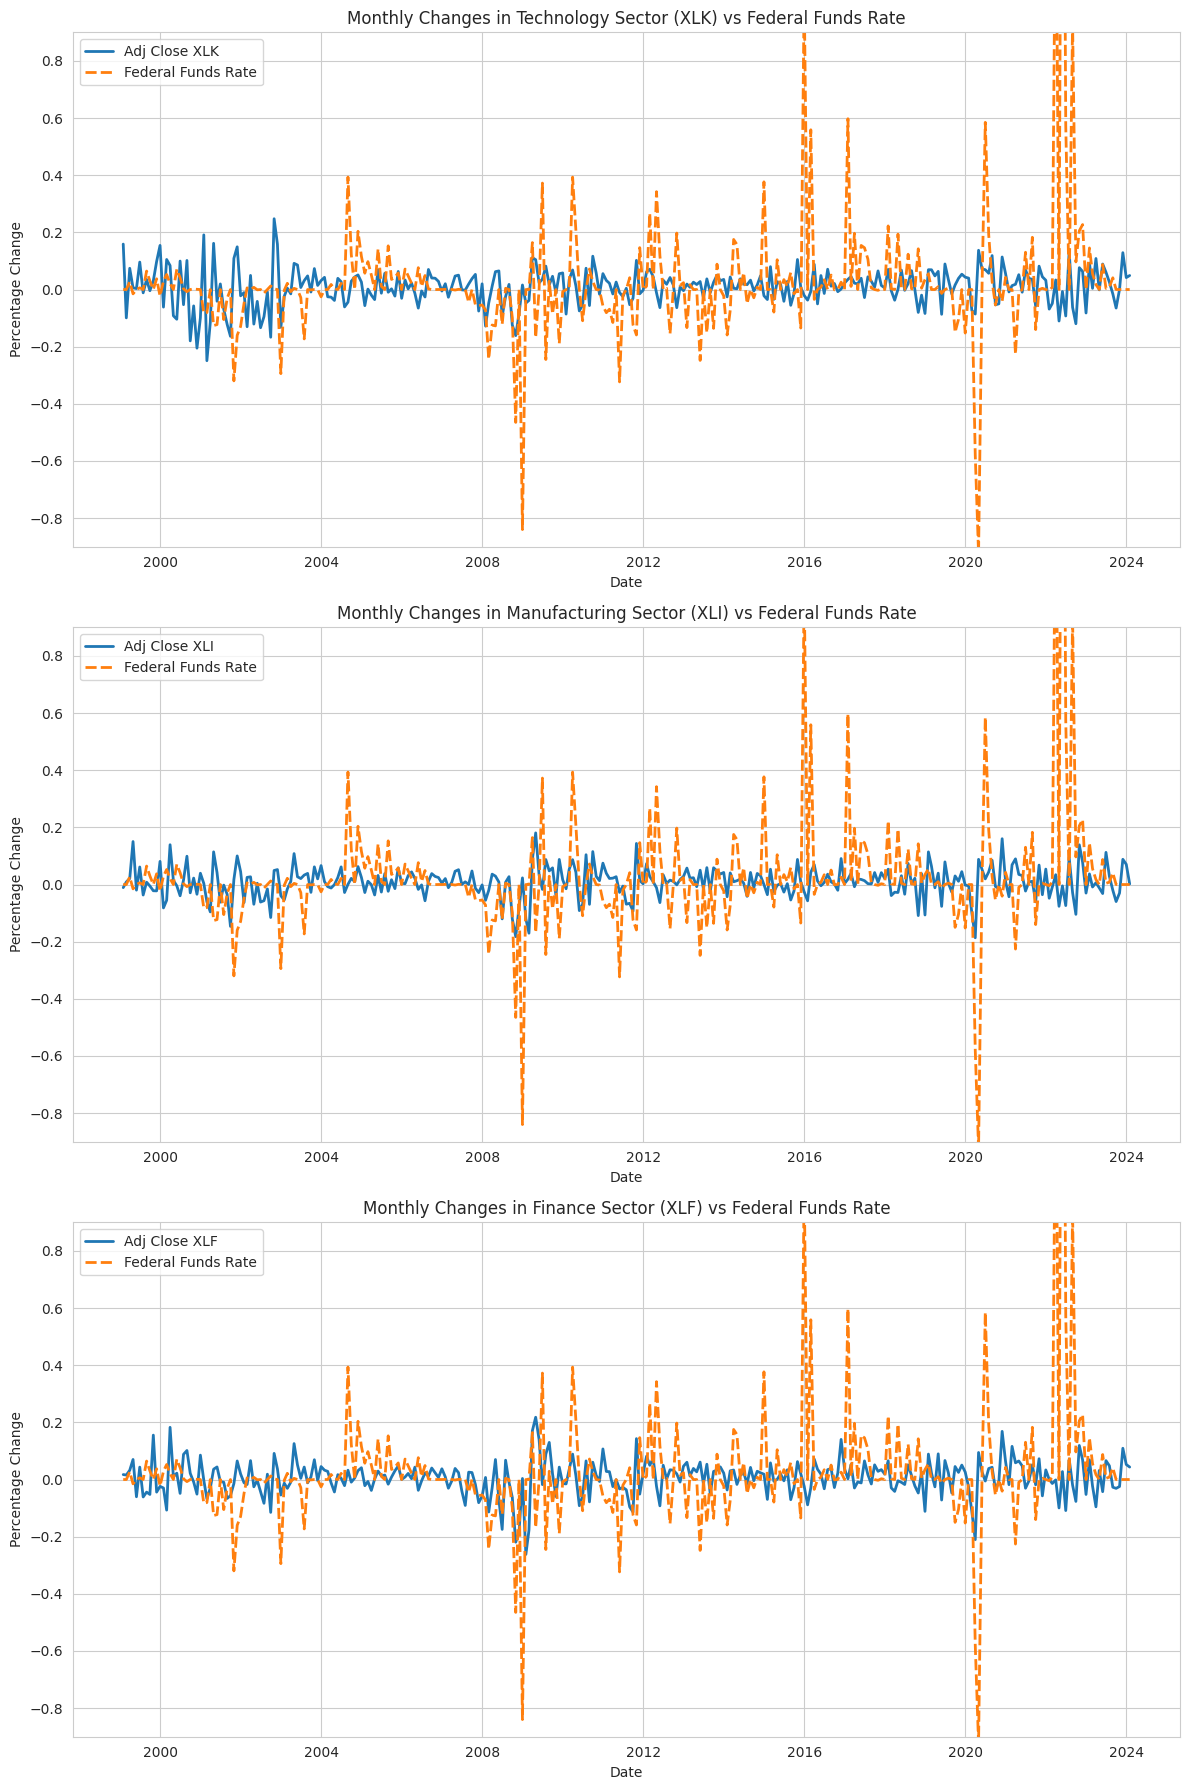

In [7]:
xlk_df = pd.read_csv('XLK.csv')  # Technology sector
xli_df = pd.read_csv('XLI.csv')  # Manufacturing sector
xlf_df = pd.read_csv('XLF.csv')  # Finance sector
dff_df = pd.read_excel('DFF.xls', skiprows=10) 

# Rename 
dff_df.columns = ['Date', 'Federal Funds Rate']

# Convert date columns to datetime format
xlk_df['Date'] = pd.to_datetime(xlk_df['Date'])
xli_df['Date'] = pd.to_datetime(xli_df['Date'])
xlf_df['Date'] = pd.to_datetime(xlf_df['Date'])
dff_df['Date'] = pd.to_datetime(dff_df['Date'])

# Resample the Federal Funds Rate data to monthly averages
dff_monthly_avg = dff_df.resample('M', on='Date').mean().reset_index()

# Merge the datasets
merged_df = xlk_df[['Date', 'Adj Close']].merge(dff_monthly_avg, on='Date', how='left')
merged_df = merged_df.merge(xli_df[['Date', 'Adj Close']], on='Date', how='left', suffixes=('_XLK', '_XLI'))
merged_df = merged_df.merge(xlf_df[['Date', 'Adj Close']], on='Date', how='left')
merged_df.columns = ['Date', 'Adj Close XLK', 'Federal Funds Rate', 'Adj Close XLI', 'Adj Close XLF']

# Set date as index and calculate monthly changes
merged_df.set_index('Date', inplace=True)
monthly_changes = merged_df.resample('M').last().pct_change().dropna()

# Visualization
sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

# limit for y-axis
y_limit = 0.9

# Technology Sector
sns.lineplot(data=monthly_changes[['Adj Close XLK', 'Federal Funds Rate']], ax=axes[0], linewidth=2)
axes[0].set_title('Monthly Changes in Technology Sector (XLK) vs Federal Funds Rate')
axes[0].set_ylabel('Percentage Change')
axes[0].set_ylim(-y_limit, y_limit)  # Setting y-axis limits

# Manufacturing Sector
sns.lineplot(data=monthly_changes[['Adj Close XLI', 'Federal Funds Rate']], ax=axes[1], linewidth=2)
axes[1].set_title('Monthly Changes in Manufacturing Sector (XLI) vs Federal Funds Rate')
axes[1].set_ylabel('Percentage Change')
axes[1].set_ylim(-y_limit, y_limit)  

# Finance Sector
sns.lineplot(data=monthly_changes[['Adj Close XLF', 'Federal Funds Rate']], ax=axes[2], linewidth=2)
axes[2].set_title('Monthly Changes in Finance Sector (XLF) vs Federal Funds Rate')
axes[2].set_ylabel('Percentage Change')
axes[2].set_ylim(-y_limit, y_limit)  

plt.tight_layout()
plt.show()


# Are the impacts of interest rate changes on stock market indices more pronounced in the short-term or do they have significant long-term effects as well?


In [9]:
df_interestrate = pd.read_csv('INTDSRUSM193N.csv')
df_FED = pd.read_csv('FEDFUNDS.csv')
df_SP = pd.read_csv('SP500.csv')
print(df_interestrate.head())
print(df_FED.head())
print(df_SP.head())
print(df_interestrate.info())
print(df_FED.info())
print(df_SP.info())


         DATE  INTDSRUSM193N
0  1950-01-01            1.5
1  1950-02-01            1.5
2  1950-03-01            1.5
3  1950-04-01            1.5
4  1950-05-01            1.5
         DATE  FEDFUNDS
0  1954-07-01      0.80
1  1954-08-01      1.22
2  1954-09-01      1.07
3  1954-10-01      0.85
4  1954-11-01      0.83
         DATE    SP500
0  2014-02-03  1741.89
1  2014-02-04  1755.20
2  2014-02-05  1751.64
3  2014-02-06  1773.43
4  2014-02-07  1797.02
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE           860 non-null    object 
 1   INTDSRUSM193N  860 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATE      835 non-n

In [10]:
# Convert 'DATE' column to datetime
df_interestrate['DATE'] = pd.to_datetime(df_interestrate['DATE'])
df_FED['DATE'] = pd.to_datetime(df_FED['DATE'])
df_SP['DATE'] = pd.to_datetime(df_SP['DATE'])

# Convert 'SP500' column to numeric and handle missing values
df_SP['SP500'] = pd.to_numeric(df_SP['SP500'], errors='coerce')

# Merge DataFrames
merged_df = pd.merge(df_SP, df_interestrate, on='DATE', how='inner')
merged_df = pd.merge(merged_df, df_FED, on='DATE', how='inner')

# Verify the merged DataFrame
print(merged_df.head)

<bound method NDFrame.head of          DATE    SP500  INTDSRUSM193N  FEDFUNDS
0  2014-04-01  1885.52           0.75      0.09
1  2014-05-01  1883.68           0.75      0.09
2  2014-07-01  1973.32           0.75      0.09
3  2014-08-01  1925.15           0.75      0.09
4  2014-09-01      NaN           0.75      0.09
..        ...      ...            ...       ...
59 2021-02-01  3773.86           0.25      0.08
60 2021-03-01  3901.82           0.25      0.07
61 2021-04-01  4019.87           0.25      0.07
62 2021-06-01  4202.04           0.25      0.08
63 2021-07-01  4319.94           0.25      0.10

[64 rows x 4 columns]>


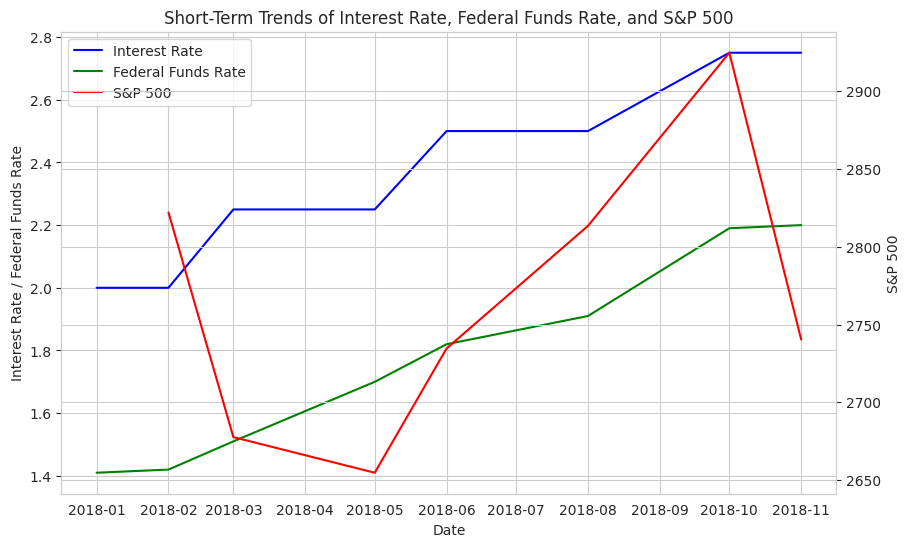

In [11]:
import matplotlib.pyplot as plt

# Filter data for the specified time frame
short_term_df = merged_df[(merged_df['DATE'] >= '2018-01-01')& (merged_df['DATE'] < '2019-01-01')]
# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the lines for interest rates
ax1.plot(short_term_df['DATE'], short_term_df['INTDSRUSM193N'], color='blue', label='Interest Rate')
ax1.plot(short_term_df['DATE'], short_term_df['FEDFUNDS'], color='green', label='Federal Funds Rate')

# Creating a secondary axis for S&P 500
ax2 = ax1.twinx()
ax2.plot(short_term_df['DATE'], short_term_df['SP500'], color='red', label='S&P 500')

# Adding labels and title
ax1.set_xlabel('Date')
ax1.set_ylabel('Interest Rate / Federal Funds Rate')
ax2.set_ylabel('S&P 500')
plt.title('Short-Term Trends of Interest Rate, Federal Funds Rate, and S&P 500')

# Adding legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Displaying the plot
plt.grid(True)
plt.show()


/tmp/ipykernel_30780/1817968074.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_term_df.fillna(short_term_df.mean(), inplace=True)


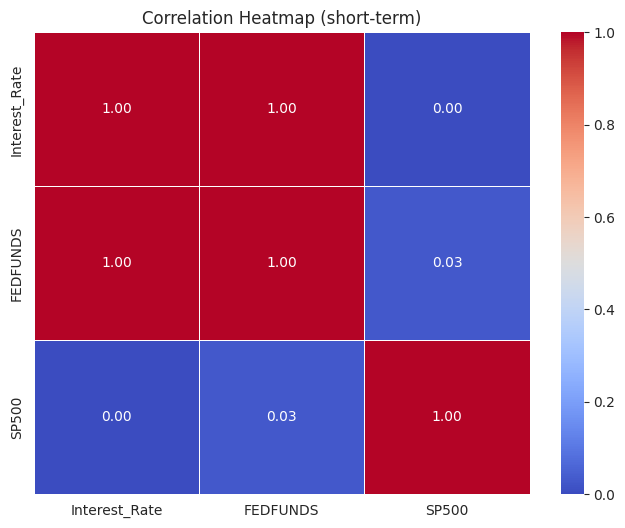

In [12]:
# Rename the column before filtering
merged_df.rename(columns={'INTDSRUSM193N': 'Interest_Rate'}, inplace=True)

# Filter data for the specified time frame
short_term_df = merged_df[(merged_df['DATE'] >= '2020-01-01') & (merged_df['DATE'] < '2021-01-01')]

# Fill missing values with the mean of each column
short_term_df.fillna(short_term_df.mean(), inplace=True)

# Calculate the correlation matrix for short-term data
short_term_corr_matrix = short_term_df[['Interest_Rate', 'FEDFUNDS', 'SP500']].corr()

# Create a heatmap for short-term correlation
plt.figure(figsize=(8, 6))
sns.heatmap(short_term_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (short-term)')
plt.show()


In [13]:
# Extract year from the 'DATE' column
df_interestrate['Year'] = df_interestrate['DATE'].dt.year
df_FED['Year'] = df_FED['DATE'].dt.year
df_SP['Year'] = df_SP['DATE'].dt.year

# Calculate average interest rate and federal funds rate by year
avg_interestrate = df_interestrate.groupby('Year')['INTDSRUSM193N'].mean().reset_index()
avg_FED = df_FED.groupby('Year')['FEDFUNDS'].mean().reset_index()

# Calculate average S&P 500 by year
avg_SP = df_SP.groupby('Year')['SP500'].mean().reset_index()

# Merge the DataFrames on the 'Year' column
merged_df = pd.merge(avg_SP, avg_interestrate, on='Year', how='inner')
merged_df = pd.merge(merged_df, avg_FED, on='Year', how='inner')

# Rename columns for clarity
merged_df.rename(columns={'INTDSRUSM193N': 'Avg_Interest_Rate', 'FEDFUNDS': 'Avg_Federal_Funds_Rate'}, inplace=True)

# Display the merged DataFrame
print(merged_df)


   Year        SP500  Avg_Interest_Rate  Avg_Federal_Funds_Rate
0  2014  1941.286970           0.750000                0.089167
1  2015  2061.067738           0.770833                0.132500
2  2016  2094.651310           1.020833                0.395000
3  2017  2449.076375           1.625000                1.001667
4  2018  2746.214024           2.458333                1.831667
5  2019  2913.360556           2.750000                2.158333
6  2020  3217.856482           0.583333                0.375833
7  2021  4273.406627           0.250000                0.080000


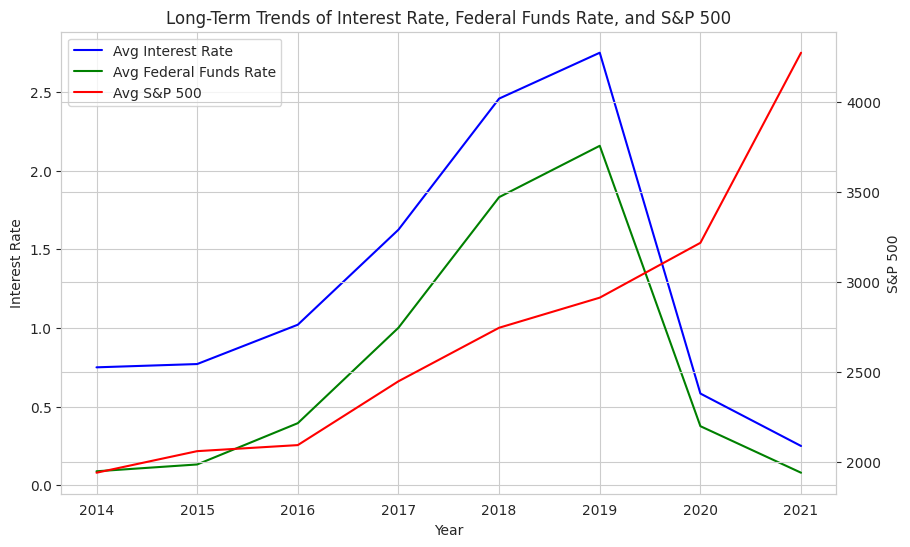

In [14]:
# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the lines for interest rates
ax1.plot(merged_df['Year'], merged_df['Avg_Interest_Rate'], color='blue', label='Avg Interest Rate')
ax1.plot(merged_df['Year'], merged_df['Avg_Federal_Funds_Rate'], color='green', label='Avg Federal Funds Rate')

# Creating a secondary axis for S&P 500
ax2 = ax1.twinx()
ax2.plot(merged_df['Year'], merged_df['SP500'], color='red', label='Avg S&P 500')

# Adding labels and title
ax1.set_xlabel('Year')
ax1.set_ylabel('Interest Rate')
ax2.set_ylabel('S&P 500')
plt.title('Long-Term Trends of Interest Rate, Federal Funds Rate, and S&P 500')

# Adding legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Displaying the plot
plt.grid(True)
plt.show()


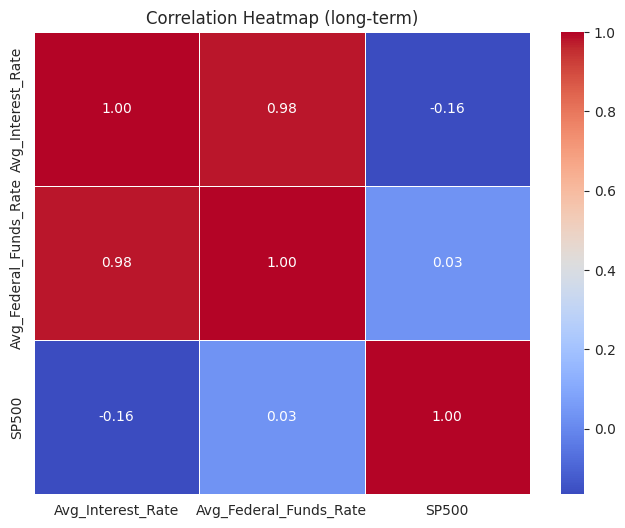

In [15]:
# Calculate the correlation matrix
corr_matrix = merged_df[['Avg_Interest_Rate', 'Avg_Federal_Funds_Rate', 'SP500']].corr()
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (long-term)')
plt.show()

# How does the impact of interest rate changes on stock markets compare with the effects of other major economic indicators?
(Vivien Tu)

In [16]:
df_interestrate = pd.read_csv('INTDSRUSM193N.csv')
df_GDP = pd.read_csv('GDP.csv')
df_inflationrate = pd.read_csv('T5YIE.csv')
df_SP = pd.read_csv('SP500.csv')

# Convert S&P 500 data to numeric type
df_SP['SP500'] = pd.to_numeric(df_SP['SP500'], errors='coerce')

# Check for any non-numeric values
non_numeric_values = df_SP[df_SP['SP500'].isnull()]['SP500']
print("Non-numeric values in S&P 500 data:")
print(non_numeric_values)

# Drop rows with non-numeric values
df_SP = df_SP.dropna(subset=['SP500'])

# Now, the S&P 500 data should be numeric
print("Data types after conversion:")
print(df_SP.dtypes)
print(df_interestrate.head())
print(df_GDP.head())
print(df_inflationrate.head())
print(df_interestrate.info())
print(df_GDP.info())
print(df_inflationrate.info())
print(df_interestrate.isnull().sum())
print(df_GDP.isnull().sum())
print(df_inflationrate.isnull().sum())


Non-numeric values in S&P 500 data:
10     NaN
54     NaN
80     NaN
109    NaN
150    NaN
        ..
2500   NaN
2558   NaN
2580   NaN
2585   NaN
2595   NaN
Name: SP500, Length: 92, dtype: float64
Data types after conversion:
DATE      object
SP500    float64
dtype: object
         DATE  INTDSRUSM193N
0  1950-01-01            1.5
1  1950-02-01            1.5
2  1950-03-01            1.5
3  1950-04-01            1.5
4  1950-05-01            1.5
         DATE      GDP
0  1947-01-01  243.164
1  1947-04-01  245.968
2  1947-07-01  249.585
3  1947-10-01  259.745
4  1948-01-01  265.742
         DATE T5YIE
0  2003-01-02  1.30
1  2003-01-03  1.28
2  2003-01-06  1.31
3  2003-01-07  1.28
4  2003-01-08  1.33
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE           860 non-null    object 
 1   INTDSRUSM193N  860 non-null    float64
dtypes: float6

Correlation between interest rate and GDP: 0.9074740146740768


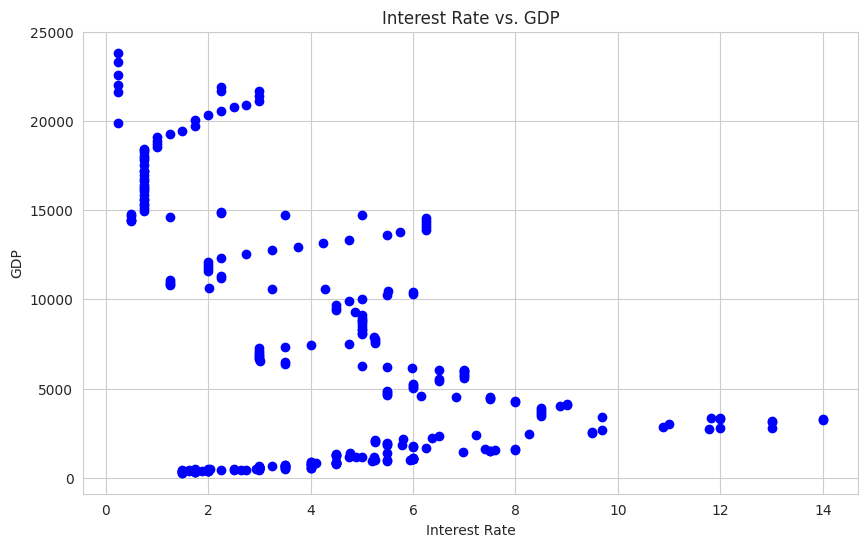

In [17]:
# Calculate correlation coefficient
correlation_interestrate_gdp = df_interestrate['INTDSRUSM193N'].corr(df_GDP['GDP'])
print("Correlation between interest rate and GDP:", correlation_interestrate_gdp)

# Convert 'DATE' column to datetime format
df_interestrate['DATE'] = pd.to_datetime(df_interestrate['DATE'])
df_GDP['DATE'] = pd.to_datetime(df_GDP['DATE'])

# Merge datasets on 'DATE' column
merged_df = pd.merge(df_interestrate, df_GDP, on='DATE', how='inner')

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['INTDSRUSM193N'], merged_df['GDP'], color='blue')
plt.title('Interest Rate vs. GDP')
plt.xlabel('Interest Rate')
plt.ylabel('GDP')
plt.grid(True)
plt.show()

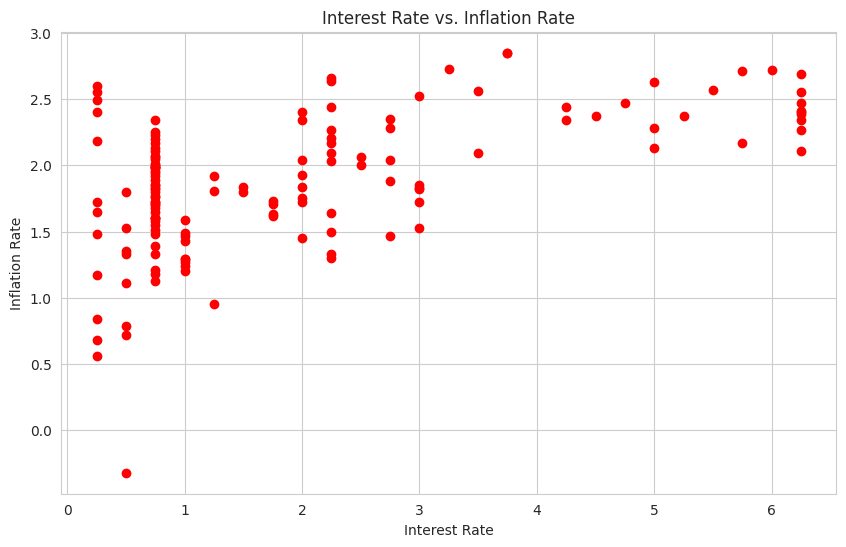

In [18]:
# Convert 'DATE' column to datetime format
df_interestrate['DATE'] = pd.to_datetime(df_interestrate['DATE'])
df_inflationrate['DATE'] = pd.to_datetime(df_inflationrate['DATE'])

# Merge datasets on 'DATE' column
merged_df = pd.merge(df_interestrate, df_inflationrate, on='DATE', how='inner')

# Convert 'T5YIE' column to numeric type
merged_df['T5YIE'] = pd.to_numeric(merged_df['T5YIE'], errors='coerce')


# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['INTDSRUSM193N'], merged_df['T5YIE'], color='red')
plt.title('Interest Rate vs. Inflation Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Inflation Rate')
plt.grid(True)
plt.show()


NameError: name 'average_by_year' is not defined

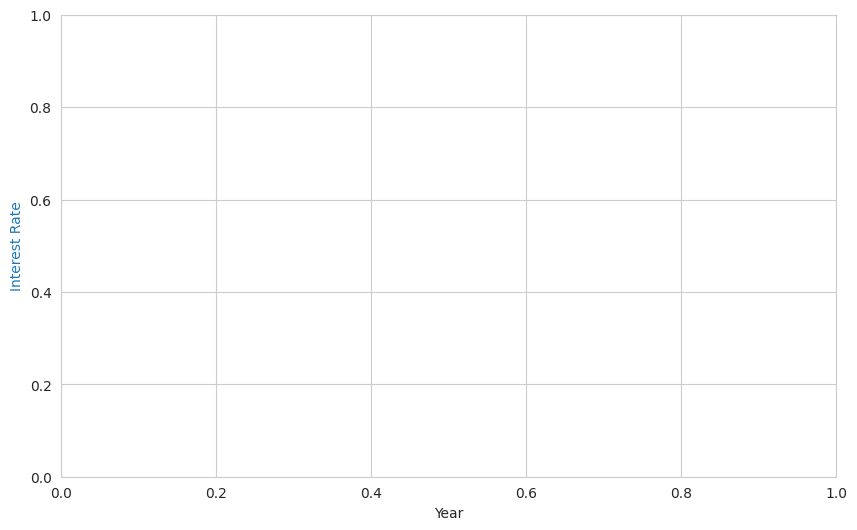

In [19]:
# Plot the data with separate y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Interest Rate
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Interest Rate', color=color)
ax1.plot(average_by_year.index, average_by_year['INTDSRUSM193N'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for GDP
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('GDP', color=color)  
ax2.plot(average_by_year.index, average_by_year['GDP'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add title and legend
plt.title('Average Interest Rate and GDP by Year')
plt.grid(True)
plt.show()


NameError: name 'average_by_year' is not defined

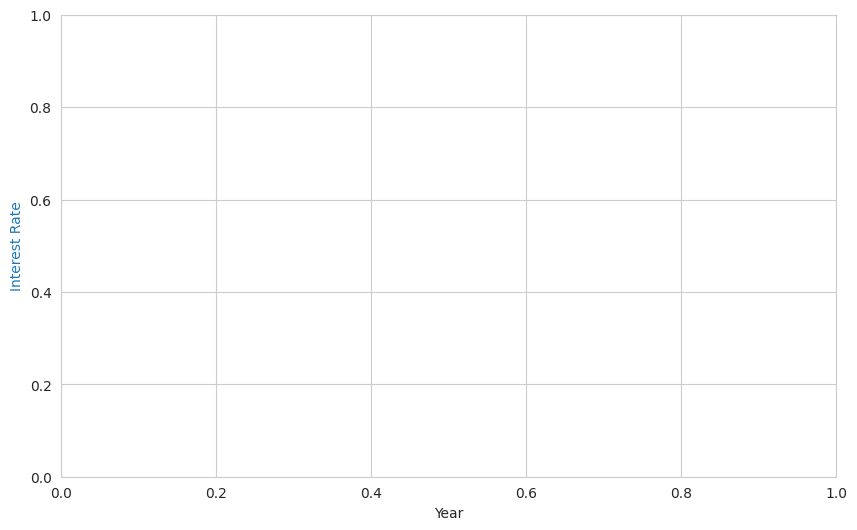

In [20]:
# Plot the data with separate y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Interest Rate
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Interest Rate', color=color)
ax1.plot(average_by_year.index, average_by_year['INTDSRUSM193N'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for GDP
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('GDP', color=color)  
ax2.plot(average_by_year.index, average_by_year['GDP'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add title and legend
plt.title('Average Interest Rate and GDP by Year')
plt.grid(True)
plt.show()


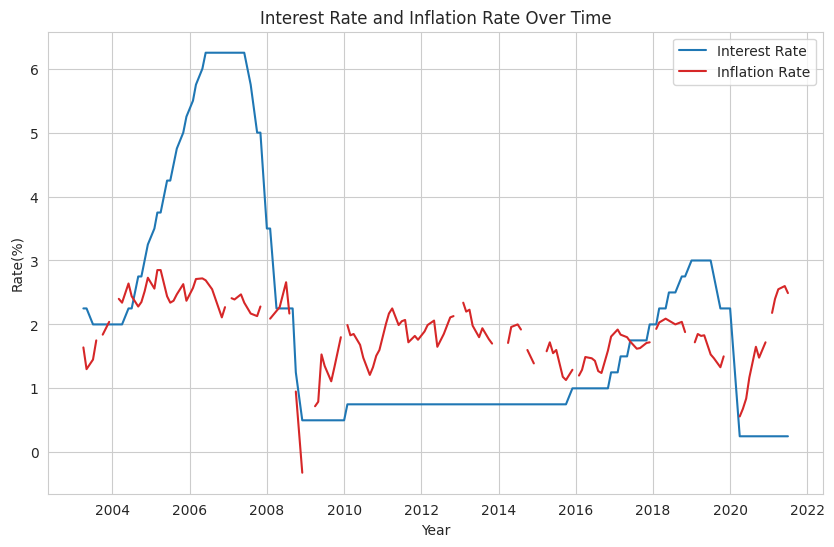

In [21]:
# Plot the data
plt.figure(figsize=(10, 6))

# Plot Interest Rate
plt.plot(merged_df['DATE'], merged_df['INTDSRUSM193N'], color='tab:blue', label='Interest Rate')

# Plot Inflation Rate
plt.plot(merged_df['DATE'], merged_df['T5YIE'], color='tab:red', label='Inflation Rate')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Rate(%)')
plt.title('Interest Rate and Inflation Rate Over Time')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()


In [22]:
df_interestrate['DATE'] = pd.to_datetime(df_interestrate['DATE'])
df_GDP['DATE'] = pd.to_datetime(df_GDP['DATE'])
df_SP['DATE'] = pd.to_datetime(df_SP['DATE'])
df_inflationrate['DATE'] = pd.to_datetime(df_inflationrate['DATE'])

# Convert 'SP500' column to numeric and handle missing values
df_SP['SP500'] = pd.to_numeric(df_SP['SP500'], errors='coerce')

# Merge DataFrames
merged_df = pd.merge(df_SP, df_interestrate, on='DATE', how='inner')
merged_df = pd.merge(merged_df, df_GDP, on='DATE', how='inner')
merged_df = pd.merge(merged_df,df_inflationrate)

print(merged_df.columns)

Index(['DATE', 'SP500', 'INTDSRUSM193N', 'GDP', 'T5YIE'], dtype='object')


In [23]:
# Convert inflation rate data to numeric type
df_inflationrate['T5YIE'] = pd.to_numeric(df_inflationrate['T5YIE'], errors='coerce')

df_interestrate['Year'] = df_interestrate['DATE'].dt.year
df_GDP['Year'] = df_GDP['DATE'].dt.year
df_SP['Year'] = df_SP['DATE'].dt.year
df_inflationrate['Year'] = df_inflationrate['DATE'].dt.year

# Calculate average interest rate and federal funds rate by year
avg_interestrate = df_interestrate.groupby('Year')['INTDSRUSM193N'].mean().reset_index()
avg_GDP = df_GDP.groupby('Year')['GDP'].mean().reset_index()


# Calculate average S&P 500 by year
avg_SP = df_SP.groupby('Year')['SP500'].mean().reset_index()
avg_inflationrate = df_inflationrate.groupby('Year')['T5YIE'].mean().reset_index()

# Merge the DataFrames on the 'Year' column
merged_df = pd.merge(avg_SP, avg_interestrate, on='Year', how='inner')
merged_df = pd.merge(merged_df, avg_GDP, on='Year', how='inner')
merged_df = pd.merge(merged_df, avg_inflationrate, on='Year', how='inner')

# Rename columns for clarity
merged_df.rename(columns={'INTDSRUSM193N': 'Avg_Interest_Rate','GDP': 'Avg_GDP', 'SP500': 'Avg_SP500', 'T5YIE': 'Avg_Inflation_Rate'}, inplace=True)

# Print out the DataFrame to check each average
print(merged_df)



   Year    Avg_SP500  Avg_Interest_Rate      Avg_GDP  Avg_Inflation_Rate
0  2014  1941.286970           0.750000  17608.13825            1.728040
1  2015  2061.067738           0.770833  18295.01900            1.377689
2  2016  2094.651310           1.020833  18804.91325            1.431720
3  2017  2449.076375           1.625000  19612.10250            1.741840
4  2018  2746.214024           2.458333  20656.51550            1.971285
5  2019  2913.360556           2.750000  21521.39500            1.600800
6  2020  3217.856482           0.583333  21322.94950            1.320518
7  2021  4273.406627           0.250000  23594.03075            2.545498


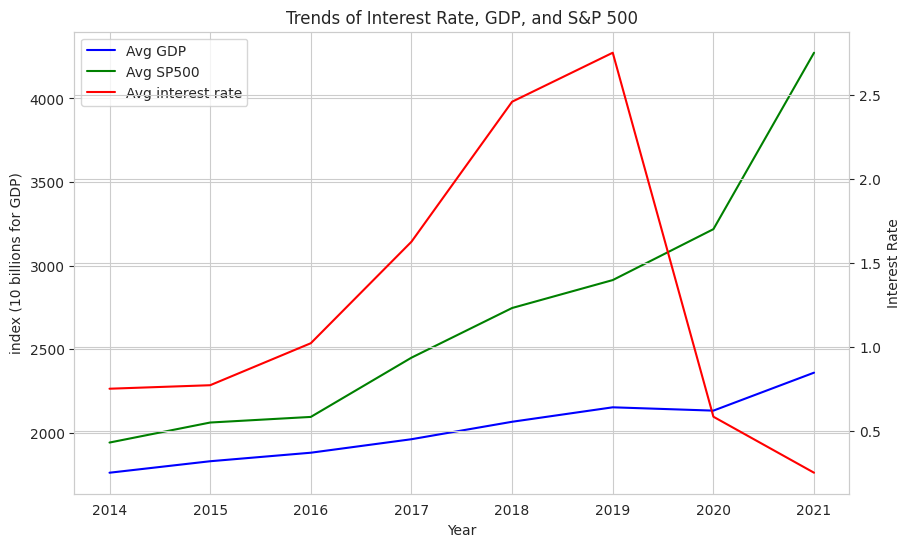

In [24]:
import matplotlib.pyplot as plt
start_date = '2014-01-01'
df_interestrate = df_interestrate[df_interestrate['DATE'] >= start_date]
df_GDP = df_GDP[df_GDP['DATE'] >= start_date]

# Scale GDP values
merged_df['Avg_GDP_scaled'] = merged_df['Avg_GDP'] / 10

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the lines for interest rates
ax1.plot(merged_df['Year'], merged_df['Avg_GDP_scaled'], color='blue', label='Avg GDP')
ax1.plot(merged_df['Year'], merged_df['Avg_SP500'], color='green', label='Avg SP500')

# Creating a secondary axis for S&P 500
ax2 = ax1.twinx()
ax2.plot(merged_df['Year'], merged_df['Avg_Interest_Rate'], color='red', label='Avg interest rate')

# Adding labels and title
ax1.set_xlabel('Year')
ax1.set_ylabel('index (10 billions for GDP)')
ax2.set_ylabel('Interest Rate')
plt.title('Trends of Interest Rate, GDP, and S&P 500')

# Adding legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Displaying the plot
plt.grid(True)
plt.show()


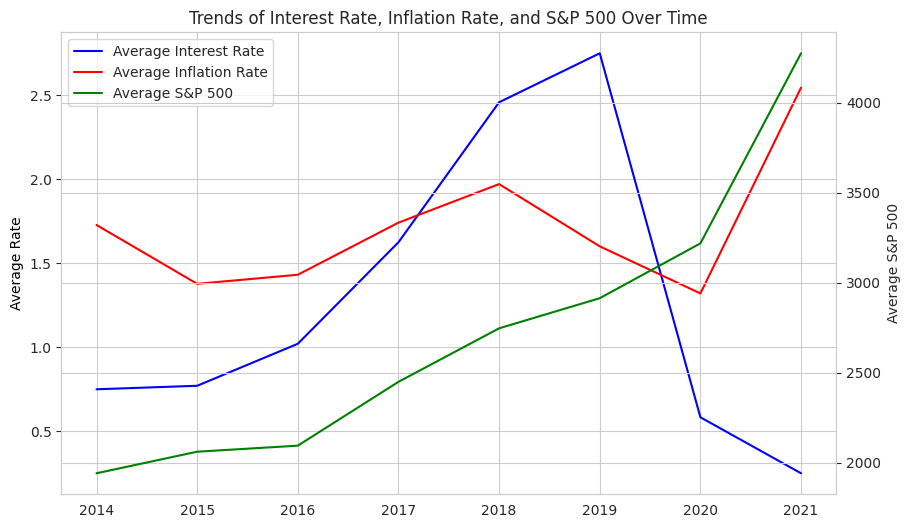

In [25]:
import matplotlib.pyplot as plt

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot interest rate
ax1.plot(merged_df['Year'], merged_df['Avg_Interest_Rate'], label='Average Interest Rate', color='blue')

# Plot inflation rate on the same axis
ax1.plot(merged_df['Year'], merged_df['Avg_Inflation_Rate'], label='Average Inflation Rate', color='red')

# Set the y-axis label
ax1.set_ylabel('Average Rate', color='black')

# Plot S&P 500 on the secondary axis
ax2 = ax1.twinx()
ax2.plot(merged_df['Year'], merged_df['Avg_SP500'], label='Average S&P 500', color='green')

# Set the y-axis label for S&P 500
ax2.set_ylabel('Average S&P 500')

# Set labels and title
plt.xlabel('Year')
plt.title('Trends of Interest Rate, Inflation Rate, and S&P 500 Over Time')

# Adding legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Show plot
plt.grid(True)
plt.show()


# How do fluctuations in the S&P 500 correlate with major currency pairs in the forex market, especially during periods of significant interest rate changes by the U.S. Federal Reserve?
(Aldric de Jacquelin)

-2007-2008 (Global Financial Crisis): In response to the financial crisis, the Fed aggressively cut the Federal Funds Rate from 5.25% in September 2007 to a range of 0-0.25% by December 2008 under Chairman Ben Bernanke.
The 2007-2008 global financial crisis was a period marked by significant and aggressive interest rate changes by the U.S. Federal Reserve (Fed) as it attempted to manage the economic fallout. During this time, the Fed made numerous adjustments to the federal funds rate to stabilize the financial system, stimulate economic growth, and address the severe liquidity crunch affecting global financial markets.
-brief overview of the key dates and interest rate changes by the Federal Reserve during the 2007-2008 global financial crisis:
2007: The Beginning of the Crisis
September 18, 2007: The Fed cuts the federal funds rate by 50 basis points (bps) from 5.25% to 4.75%. This was the first rate cut in four years, signaling the start of an easing cycle to address the emerging financial strains.
October 31, 2007: Another rate cut, this time by 25 bps, bringing the rate down to 4.50%.
December 11, 2007: The Fed reduces the federal funds rate by 25 bps to 4.25%.
2008: Escalation and Aggressive Rate Cuts
January 22, 2008: In an emergency meeting, the Fed cuts the federal funds rate by 75 bps to 3.50%, responding to severe market turmoil.
January 30, 2008: Another cut, just eight days later, by 50 bps to 3.00%.
March 18, 2008: The Fed lowers the rate by 75 bps to 2.25%, following the collapse of Bear Stearns.
April 30, 2008: A further reduction by 25 bps to 2.00%.
October 8, 2008: In a coordinated effort with other central banks, the Fed cuts the rate by 50 bps to 1.50%. This was part of a global response to the worsening financial crisis.
October 29, 2008: The Fed reduces the rate by another 50 bps to 1.00%.
December 16, 2008: The Fed makes a historic move by lowering the rate to a range of 0.00% to 0.25%, effectively bringing it down to near zero. This unprecedented action marked the beginning of the zero interest rate policy (ZIRP) era.
These rate adjustments were part of the Fed's broader strategy to combat the financial crisis, which also included quantitative easing programs, emergency lending facilities, and other unconventional policy tools. The aggressive rate cuts in 2007 and 2008 were aimed at easing credit conditions, restoring confidence in the financial system, and preventing a deeper economic downturn


# Analysis 1: Correlation Analysis between S&P 500 and Major Forex Pairs around Rate Cuts
We will analyze how the S&P 500 index's movements correlate with major currency pairs (EURUSD, USDCAD, USDCHF, USDJPY) around the dates of interest rate changes by the Fed during the 2007-2008 crisis.

/tmp/ipykernel_5120/640005577.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  forex_dfs_daily[pair] = forex_dfs_daily[pair].fillna(method='ffill')


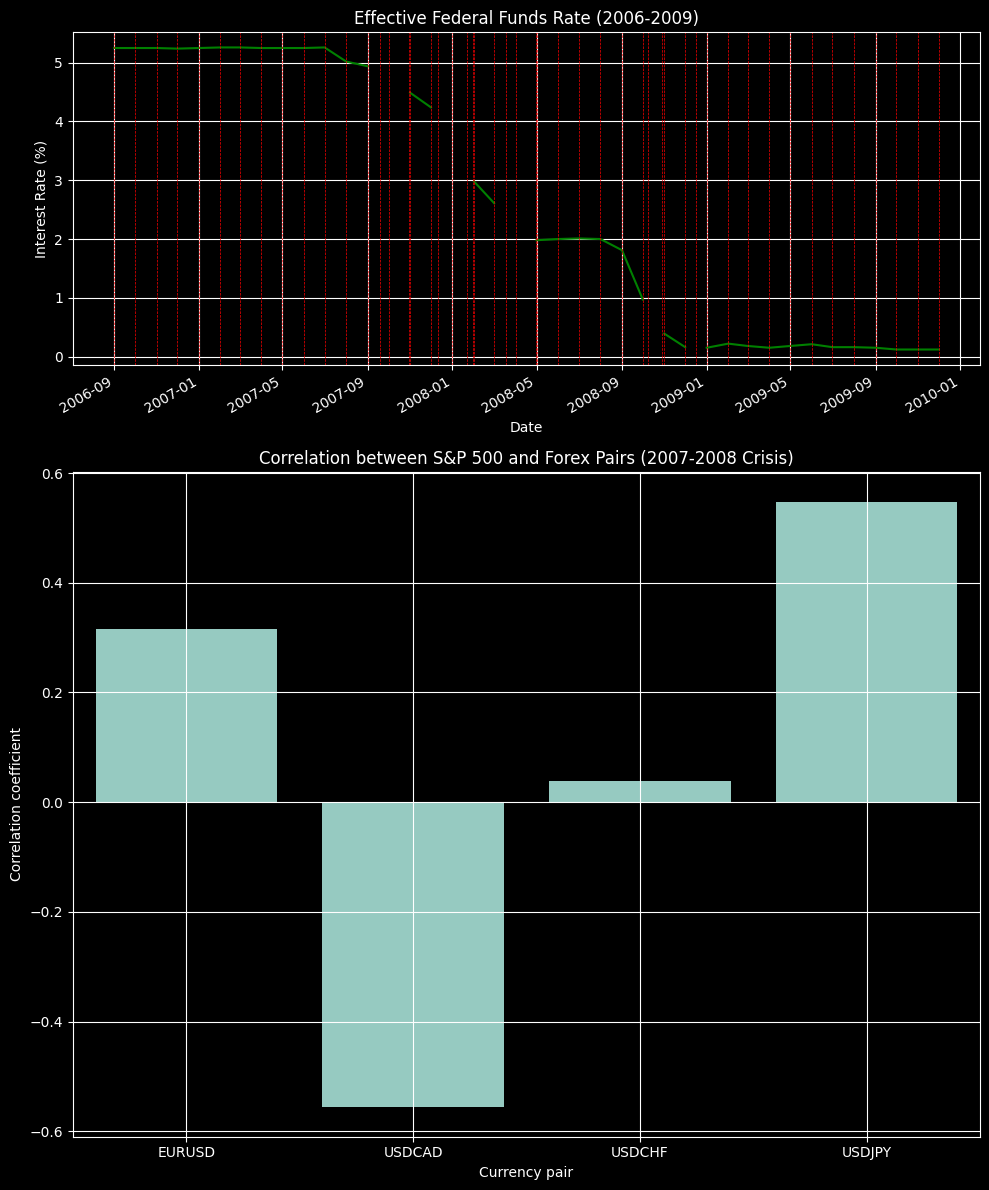

In [13]:
spx_df = pd.read_csv('SPX.csv', parse_dates=['Date'], index_col='Date')
forex_pairs = ['EURUSD', 'USDCAD', 'USDCHF', 'USDJPY']
forex_dfs = {pair: pd.read_csv(f'{pair}.csv', parse_dates=['DATE_TIME'], index_col='DATE_TIME') for pair in forex_pairs}
fed_rates_df = pd.read_csv('Fed_Reserve_Interest_Rates_1954_Present.csv', parse_dates={'Date': ['Year', 'Month', 'Day']}, index_col='Date')

# Focus on the crisis period
start_date = '2006-09-01'
end_date = '2009-12-31'
fed_crisis = fed_rates_df.loc[start_date:end_date]
# Resample forex data to daily frequency
forex_dfs_daily = {pair: df.resample('D').last() for pair, df in forex_dfs.items()}
plt.style.use('dark_background') 
# Fill missing values using the previous value
for pair in forex_pairs:
    forex_dfs_daily[pair] = forex_dfs_daily[pair].fillna(method='ffill')

# Calculate daily returns
spx_crisis = spx_df.loc[start_date:end_date]
spx_returns = spx_crisis['Adj Close'].pct_change().dropna()
forex_returns = {pair: forex_dfs_daily[pair]['CLOSE'].pct_change().dropna() for pair in forex_dfs_daily}

# Calculate correlations
correlations = {pair: spx_returns.corr(forex_returns[pair]) for pair in forex_pairs}

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12), gridspec_kw={'height_ratios': [1, 2]})

# First subplot for Federal Funds Rate
fed_crisis['Effective Federal Funds Rate'].plot(ax=ax1, color='green')
ax1.set_title('Effective Federal Funds Rate (2006-2009)')
ax1.set_ylabel('Interest Rate (%)')
ax1.grid(True)

# Highlight the rate change dates on the line plot
for date in fed_crisis.index:
    ax1.axvline(x=date, color='red', linestyle='--', lw=0.5)

# Second subplot for the correlation bar chart
sns.barplot(x=list(correlations.keys()), y=list(correlations.values()), ax=ax2)
ax2.set_title('Correlation between S&P 500 and Forex Pairs (2007-2008 Crisis)')
ax2.set_ylabel('Correlation coefficient')
ax2.set_xlabel('Currency pair')
ax2.grid(True)

plt.tight_layout()
plt.show()

The top graph shows the effective Federal Funds Rate over time, from 2006 to 2009. The plot is a line graph against a time axis (x-axis) with the interest rate percentage on the y-axis. The Federal Funds Rate is shown declining sharply over this period, which is consistent with the aggressive rate cuts by the Fed during the financial crisis. The vertical red dashed lines represent the dates of significant economic events or policy changes.
The bottom bar chart is showing the correlation between S&P 500 and four major currency pairs (EURUSD, USDCAD, USDCHF, USDJPY) during the 2007-2008 financial crisis. The correlation coefficients are plotted on the y-axis, with the currency pairs on the x-axis. It seems that EURUSD and USDJPY have a positive correlation with the S&P 500, whereas USDCAD and USDCHF have a negative correlation. The correlation coefficients for EURUSD and USDJPY are higher, suggesting a stronger relationship with the S&P 500 movements than USDCAD and USDCHF during this period.
The display shows the trends in the Federal Funds Rate alongside the correlation of the S&P 500 with various forex pairs.

# Analysis 2: Impact of Fed Rate Cuts on S&P 500 Volatility
To assess how the S&P 500's volatility responded to Fed's rate cuts during the crisis period

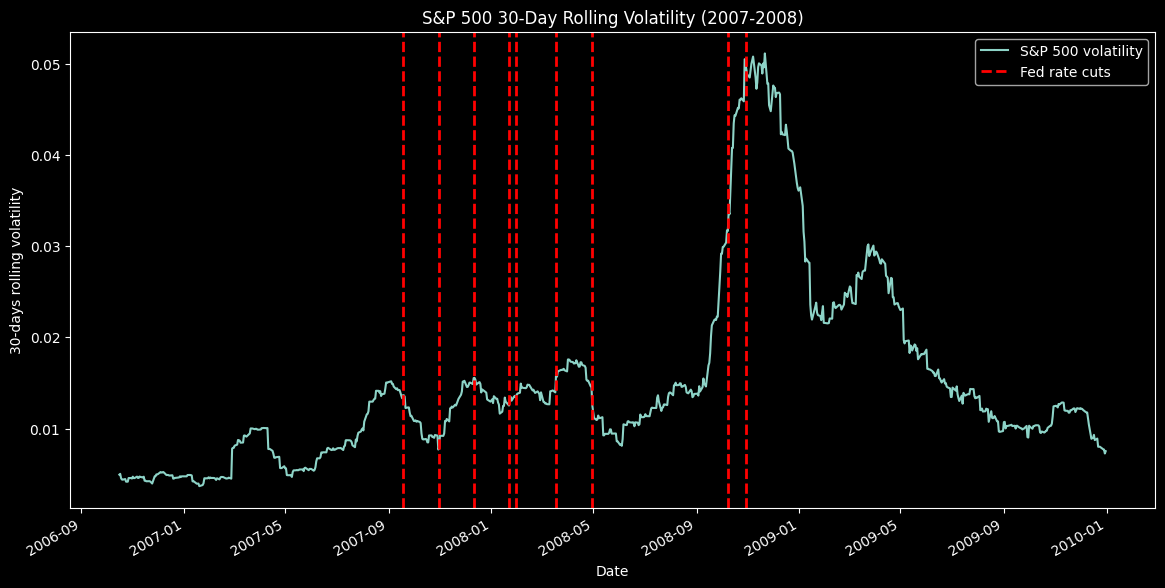

In [14]:
# Calculate rolling volatility (standard deviation of returns) for a 30-day window
spx_volatility = spx_returns.rolling(window=30).std()
# Identify Fed rate cut dates
rate_cut_dates = fed_crisis[fed_crisis['Federal Funds Target Rate'].diff() < 0].index

plt.figure(figsize=(14, 7))
spx_volatility.plot(title='S&P 500 30-Day Rolling Volatility (2007-2008)')
for date in rate_cut_dates:
    plt.axvline(x=date, color='red', linestyle='--', lw=2)
plt.ylabel('30-days rolling volatility')
plt.legend(['S&P 500 volatility', 'Fed rate cuts'])
plt.show()

# Analysis 3: Comparative analysis of Forex Pair responses to Fed rate cuts
We will compare how different forex pairs responded immediately after the Fed's rate cuts during the crisis period.

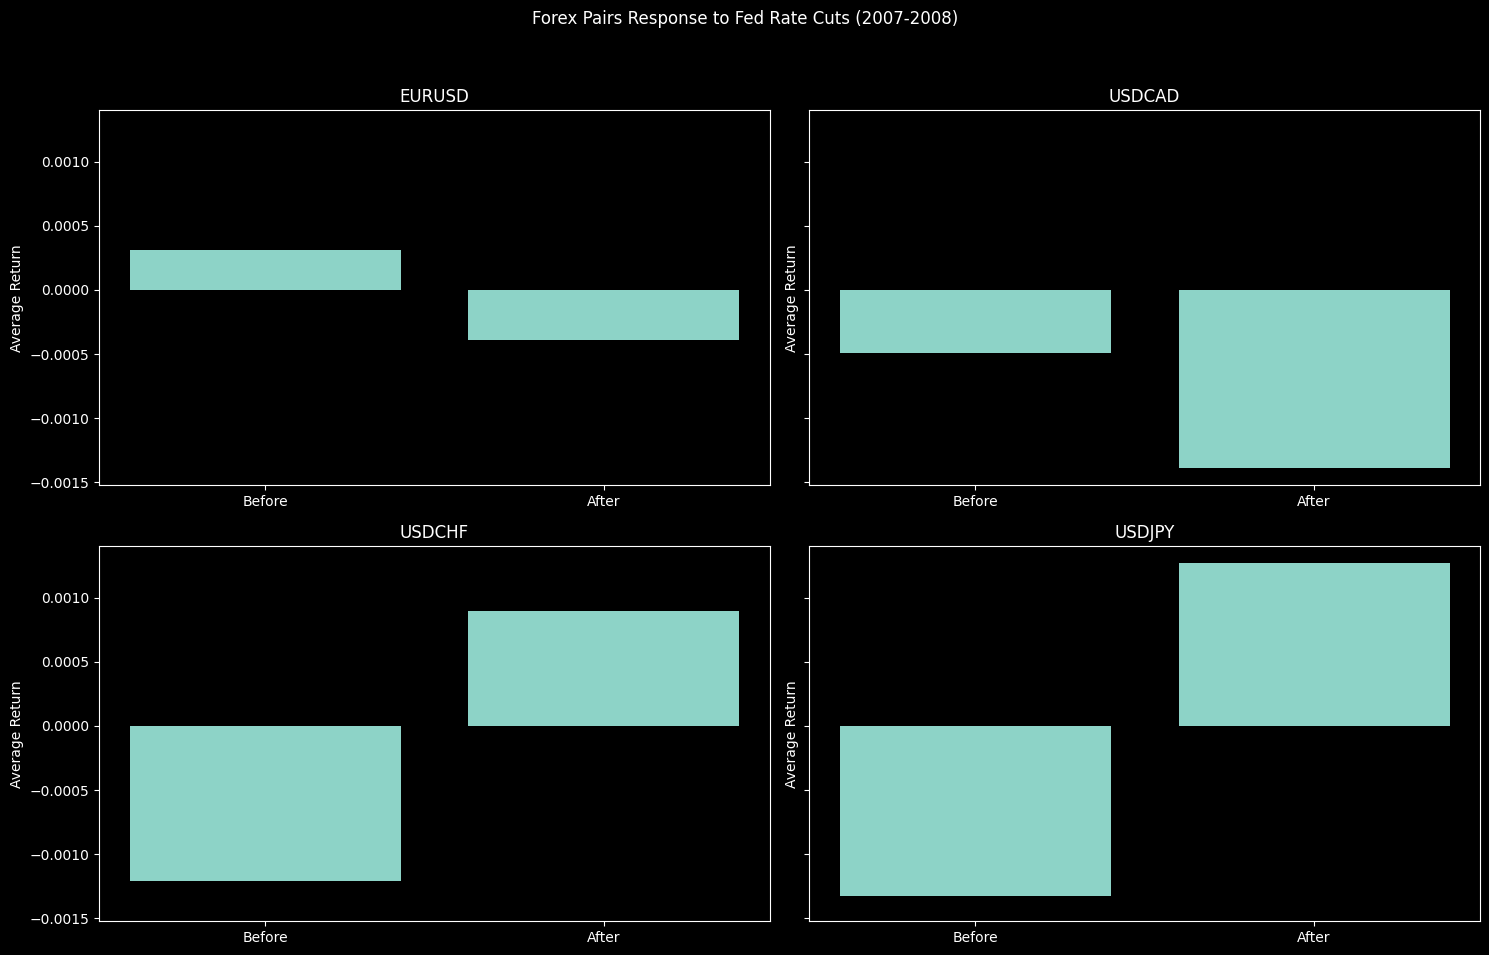

In [15]:
# Compute the mean return for each forex pair 5 days before and after Fed rate cuts
before_after_returns = {pair: [] for pair in forex_pairs}
for date in rate_cut_dates:
    for pair in forex_pairs:
        before = forex_returns[pair].loc[date - pd.Timedelta(days=5):date].mean()
        after = forex_returns[pair].loc[date:date + pd.Timedelta(days=5)].mean()
        before_after_returns[pair].append((before, after))

# Visualization
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharey=True)
for ax, (pair, data) in zip(axs.flatten(), before_after_returns.items()):
    before, after = zip(*data)
    ax.bar(['Before', 'After'], [np.mean(before), np.mean(after)])
    ax.set_title(pair)
    ax.set_ylabel('Average Return')
plt.suptitle('Forex Pairs Response to Fed Rate Cuts (2007-2008)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Analysis 4: Long-Term Trends and Reactions in Forex Pairs and S&P 500 During Crisis
We aim to examine the long-term trends in the S&P 500 and major forex pairs during the crisis, highlighting key Federal Reserve rate cut dates.

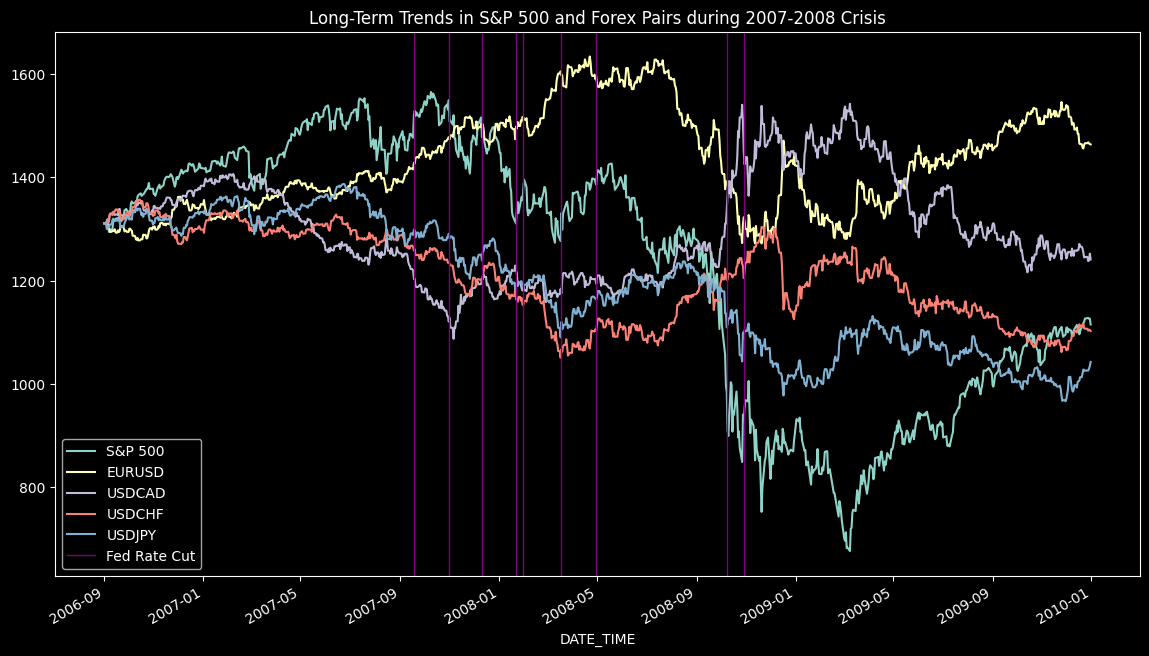

In [17]:
# Filter forex data for the crisis period to create forex_crisis
forex_crisis = {pair: df.loc[start_date:end_date] for pair, df in forex_dfs_daily.items()}

plt.figure(figsize=(14, 8))
spx_crisis['Adj Close'].plot(label='S&P 500')

for pair, df in forex_crisis.items():
    # Normalize forex data for comparison
    normalized_forex = (df['CLOSE'] / df['CLOSE'].iloc[0]) * spx_crisis['Adj Close'].iloc[0]
    normalized_forex.plot(label=pair)

# Assuming rate_cut_dates is a list or Pandas Series of rate cut dates
for date in rate_cut_dates:
    plt.axvline(x=date, color='purple', linestyle='-', linewidth=1, label='Fed Rate Cut' if date == rate_cut_dates[0] else "")

plt.title('Long-Term Trends in S&P 500 and Forex Pairs during 2007-2008 Crisis')
plt.legend()
plt.show()

Normalized Price Trends:
The lines represent the normalized price movements of the S&P 500 index and the four forex pairs from 2006 until the beginning of 2010.
Normalization allows us to compare the relative performance of these different instruments on the same scale, despite their different absolute price levels.

The green line shows a significant downward trend starting in late 2007, reaching a trough in early 2009, which aligns with the timeline of the financial crisis.
Each currency pair has its own distinct path, but there are periods where multiple pairs move in tandem either with each other or inversely to the S&P 500.
EURUSD pair exhibits a peak around the same time the S&P 500 begins to fall, indicating a possible flight to safety or a shift away from U.S. dollar assets.
USDCAD dollar seems to weaken against the U.S. dollar during the crisis, which could be reflective of falling oil prices during this period, given Canada's status as an oil-exporting country.
The Swiss Franc, often considered a safe-haven currency, appreciates against the U.S. dollar initially but then follows a similar downturn as the S&P 500 through 2008.
The Japanese Yen strengthens against the dollar during the crisis, which is consistent with a risk-off environment where investors might seek the safety of Japanese government bonds.

The vertical lines likely represent significant monetary policy events, such as interest rate cuts by the Federal Reserve.
The clustered lines in late 2007 and throughout 2008 mark the period of aggressive rate cutting by the Fed in response to the crisis, with the most intense period of policy action coinciding with the sharpest declines in the S&P 500 and increased divergence among the forex pairs.

The visualization suggests varying degrees of correlation between the S&P 500's movement and the forex pairs, with some currency pairs appearing to react more sensitively to the same economic events than others.
While correlations may be observed, causation is more complex to establish. The forex market is influenced by a multitude of factors, including interest rate differentials, economic data, commodity prices, and overall risk sentiment.

The significant downward trend in the S&P 500 during the crisis reflects the widespread financial turmoil and the bear market in U.S. equities.The movements in the forex market also reflect shifts in investor sentiment and risk appetite, with money flowing between currencies based on changing economic outlooks and interest rate expectations.

Post the crisis period, the S&P 500 and the forex pairs begin to stabilize and, in some cases, recover as the global economy starts to heal and monetary policy remains accommodative.
The recovery paths are not uniform, reflecting the varying speeds and strengths of economic recovery in different regions.

# Analysis 5: Forex Market Volatility in Response to S&P 500 Changes During Fed Rate Adjustments
This analysis investigates the volatility in major forex pairs (EURUSD, USDCAD, USDCHF, USDJPY) in response to changes in the S&P 500, particularly around the dates of significant U.S. Federal Reserve interest rate adjustments during the 2007-2008 financial crisis. By examining the volatility before, during, and after S&P 500 fluctuations on Fed rate cut days, we can gain a better understanding into how forex markets respond to U.S. equity market movements influenced by monetary policy changes.

/tmp/ipykernel_5120/354971570.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fed_crisis_dates = fed_rates_df.loc[crisis_start:crisis_end][fed_rates_df['Federal Funds Target Rate'].diff() != 0].index


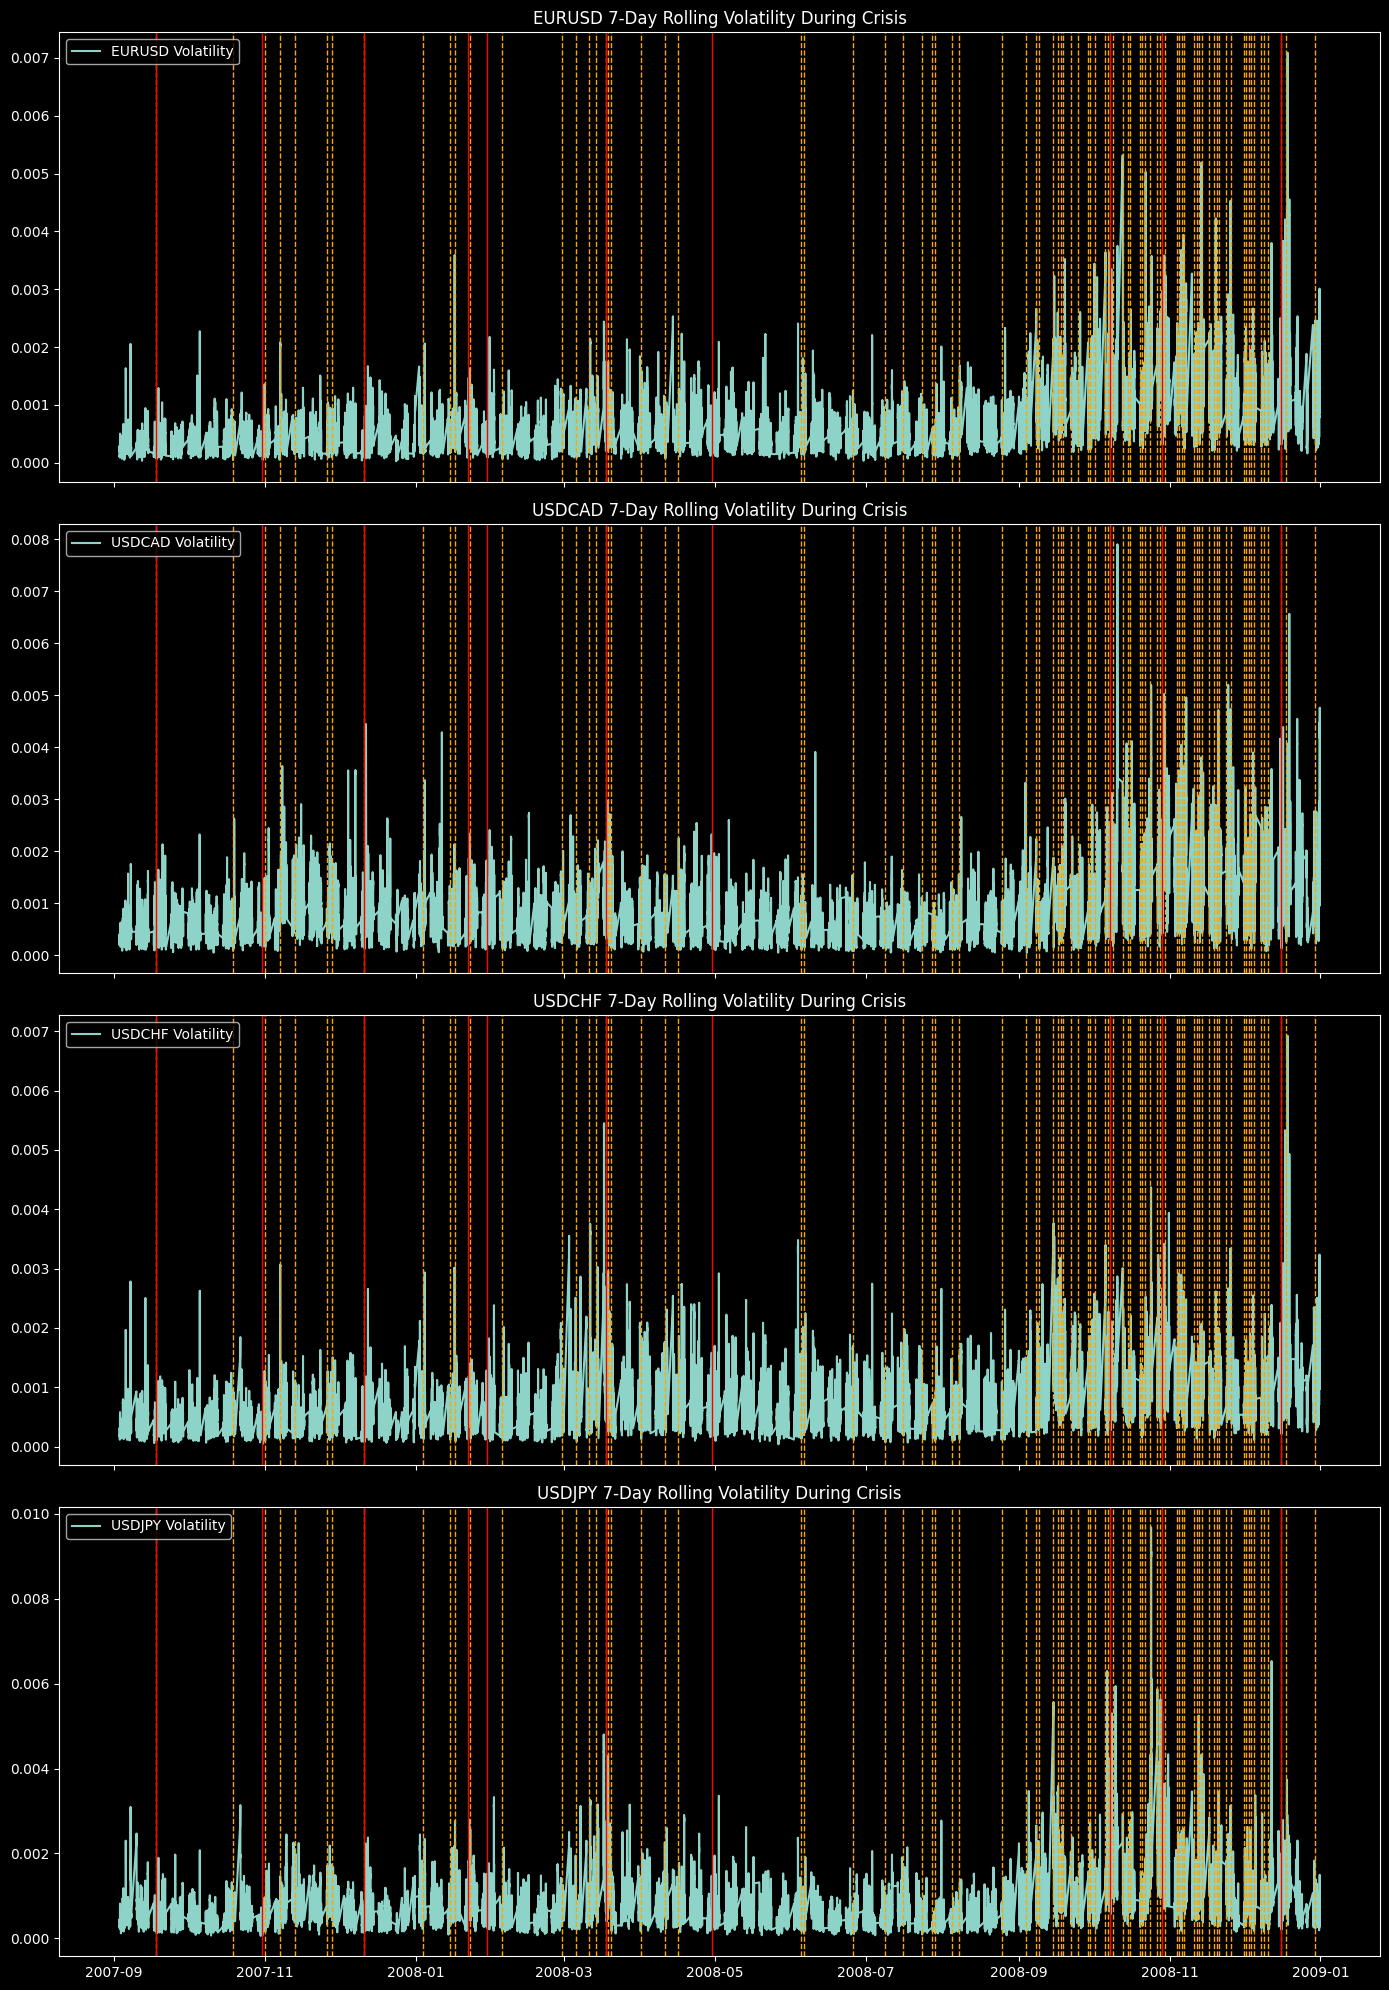

In [22]:
# Narrow down to the crisis period
crisis_start, crisis_end = '2007-09-01', '2008-12-31'
spx_crisis = spx_df.loc[crisis_start:crisis_end]
forex_crisis = {pair: df.loc[crisis_start:crisis_end] for pair, df in forex_dfs.items()}
fed_crisis_dates = fed_rates_df.loc[crisis_start:crisis_end][fed_rates_df['Federal Funds Target Rate'].diff() != 0].index

# Calculate S&P 500 daily returns and identify significant change days (above 75th percentile)
spx_returns = spx_crisis['Adj Close'].pct_change()
significant_spx_changes = spx_returns.abs() > spx_returns.abs().quantile(0.75)

# Forex market volatility: rolling 7-day standard deviation of daily returns
forex_volatility = {pair: df['CLOSE'].pct_change().rolling(window=7).std() for pair, df in forex_crisis.items()}

# Visualization
fig, axs = plt.subplots(len(forex_pairs), 1, figsize=(14, 20), sharex=True)

for i, (pair, vol) in enumerate(forex_volatility.items()):
    axs[i].plot(vol, label=f'{pair} Volatility')
    axs[i].set_title(f'{pair} 7-Day Rolling Volatility During Crisis')
    
    # Highlight significant S&P 500 change days and Fed rate cut days
    for date in significant_spx_changes[significant_spx_changes].index:
        axs[i].axvline(x=date, color='orange', linestyle='--', lw=1)
    for date in fed_crisis_dates:
        axs[i].axvline(x=date, color='red', linestyle='-', lw=1)
    
    axs[i].legend()

plt.tight_layout()
plt.show()

The visualization shows the 7-day rolling volatility of four major currency pairs: EURUSD, USDCAD, USDCHF, and USDJPY, during the period surrounding the 2007-2008 financial crisis.
Each subplot represents the rolling volatility of one currency pair, calculated using the standard deviation of percentage changes in the closing prices over a 7-day rolling window. Volatility is a common measure of market risk or instability, with higher values indicating greater uncertainty or variability in price movements.
The four subplots from top to bottom are for the currency pairs EURUSD, USDCAD, USDCHF, and USDJPY respectively.
The x-axis spans a time frame from September 2007 through January 2009, covering the critical period of the financial crisis.
The cyan line in each plot indicates the level of volatility over time. Spikes in the line suggest periods when the currency pair experienced higher variability and potential market stress.

Significant Dates:
Red Vertical Lines: These likely represent the dates of Federal Reserve interest rate cuts. Their proximity to spikes in volatility suggests that these events had a significant impact on the forex market, potentially leading to increased trading activity and price movement.
Orange doted vertical lines: While not explicitly labeled, these could represent other significant financial events or announcements that impacted market volatility. If these lines coincide with known dates of major economic data releases, policy announcements by other central banks, or significant geopolitical events, they may have also contributed to the observed volatility.

 By comparing the subplots, we can observe how different currency pairs responded to the same events. Some pairs may show higher sensitivity to Fed rate cuts or other events, as indicated by larger spikes in volatility. It's also noticeable that volatility tends to increase over time for each pair, which might be associated with the deepening of the financial crisis as it evolved.
A high correlation between Fed rate cut dates and peaks in forex volatility can imply a strong market reaction to U.S. monetary policy. Forex traders might anticipate higher risk and potential trading opportunities around these dates. Additionally, the varying responses among different currency pairs can reflect the differing levels of exposure or sensitivity to U.S. economic conditions and Fed policy changes.

This analysis is crucial for understanding market dynamics, as it illustrates the immediate and lingering effects of monetary policy on forex markets. It suggests that central bank policies can lead to significant fluctuations in currency values, which can impact investors, traders, and economic conditions globally.

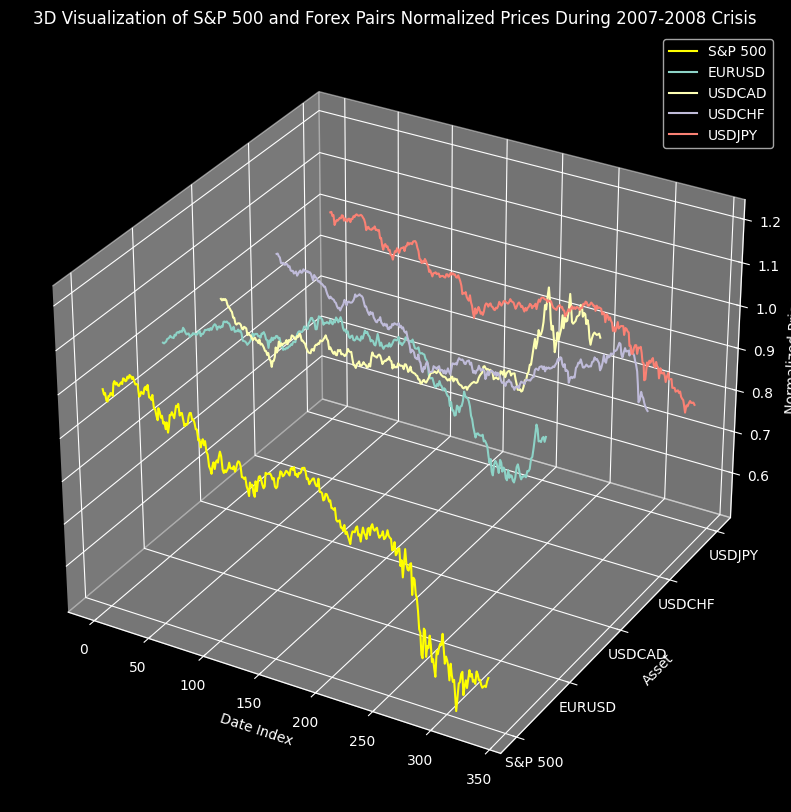

In [24]:
# Ensure imports are done
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

# Start by defining the figure for 3D plotting
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

# Generate a numerical array for the dates to use in plotting
dates = spx_crisis.index
num_dates = np.arange(len(dates))

# Normalize the S&P 500 data for plotting
spx_normalized = (spx_crisis['Adj Close'] / spx_crisis['Adj Close'].iloc[0]).values

# Ensure the S&P 500 plot uses the correct dimensions
ax.plot(num_dates, np.zeros(len(num_dates)), spx_normalized, label='S&P 500', color='yellow')

# Iterate through each forex pair for plotting
for i, (pair, df) in enumerate(forex_crisis.items(), start=1):
    # Align the forex data with the S&P 500 dates
    aligned_forex = df.reindex(dates, method='nearest')['CLOSE'] / df['CLOSE'].iloc[0]
    # Normalize the forex data for plotting
    normalized_forex = aligned_forex.values
    # Ensure that the plotting command uses arrays of the same length
    ax.plot(num_dates, np.full(len(num_dates), i), normalized_forex, label=pair)

# Customize the axes
ax.set_xlabel('Date Index')
ax.set_ylabel('Asset')
ax.set_zlabel('Normalized Price')
ax.set_yticks(range(len(forex_pairs) + 1))
ax.set_yticklabels(['S&P 500'] + forex_pairs)

plt.legend()
plt.title('3D Visualization of S&P 500 and Forex Pairs Normalized Prices During 2007-2008 Crisis')
plt.show()
